# Linear_Regression Techniques By rajeev singh sisodiya

The dataset we will be working with contains a wide range of features, including information about the properties, their location, and other relevant attributes. By leveraging various data science tools and techniques, we aim to create a model that provides accurate price estimates.

1. Import libraries
2. download below mentioned dataset from my github Id.
test.csv
trai.csv
sample_submission.csv
house_price_linearregression.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
# will add libraries as an when needed

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [ ]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
df=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
print(f"Full DataSet Shape is : {df.shape}")
print(f"Full Test DataSet Shape is : {test.shape}")

Full DataSet Shape is : (1460, 81)
Full Test DataSet Shape is : (1459, 80)


For #Data Pre_profiling install pandas-profiling

In [ ]:
pip install pandas-profiling

In [ ]:
import pandas_profiling as pp

In [ ]:
profile = pp.ProfileReport(df)
profile.to_file('Advanced_House_price_prediction_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

3. Preprocessing of dataset till 0-9 column

In [ ]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

4. Dropped **'Id'** columns from dataset

In [ ]:
df.drop(columns=(['Id']), inplace=True)

In [ ]:
df.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [ ]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

# 5. drop duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
missing=df.isnull().sum()
lendf=len(df)
perc=(missing/lendf)*100
#print(perc)
col_nam=[]
for i, j in perc.items():
    if j >=40:
        col_nam.append(i)
print(f"List of Columsn has less more than 40% missing values: \t {col_nam} ")
df.drop(columns=(col_nam), inplace=True)
df.shape

List of Columsn has less more than 40% missing values: 	 ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] 


(1460, 75)

#6. Variable Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


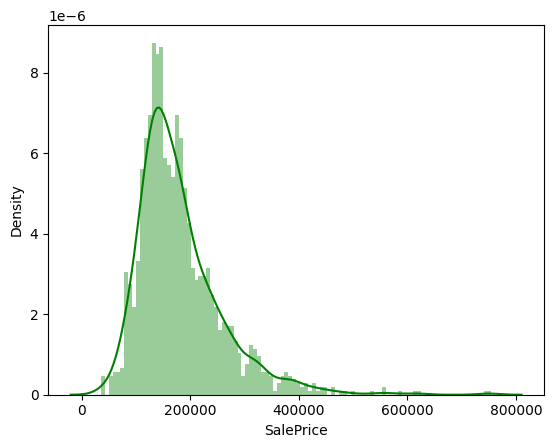

In [ ]:
print(df['SalePrice'].describe())
sns.distplot(df['SalePrice'], hist_kws={'alpha': 0.4}, bins=100, color='g' )
plt.show()

7. Data seperation

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
df_num=df.select_dtypes(include=['int64', 'float64'])

In [ ]:
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [ ]:
df_cat=df.select_dtypes('O')
df_cat.head(2)

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal

8. Fill missing values

In [ ]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [ ]:
backup=df.copy()

In [ ]:
filled_df = df.fillna(df.mode().iloc[0])

In [ ]:
filled_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

# 9. Dataset will work on numeric columns

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

10. data set correlation

In [ ]:
df_num.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

11. Correlation Heatmap

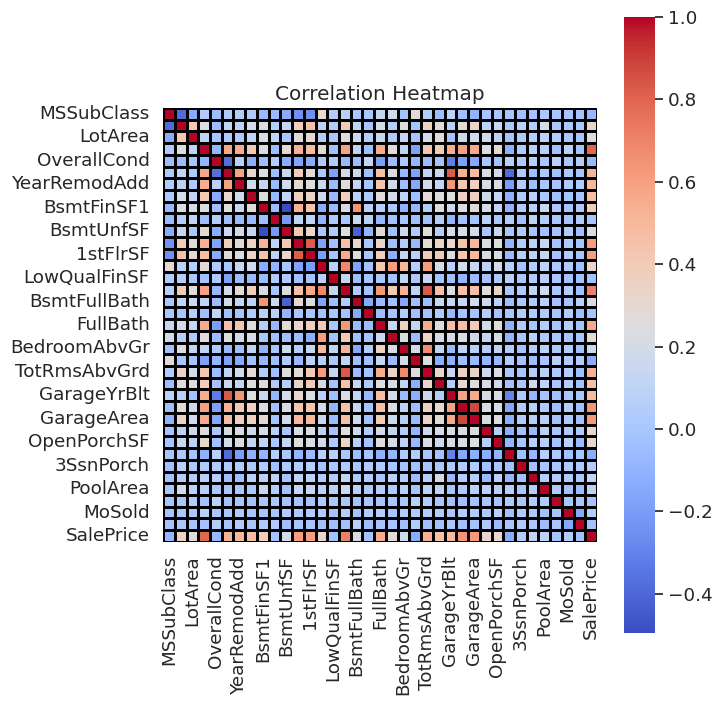

In [ ]:
cormat=df_num.corr()
paper=plt.figure(figsize=(7,8))
sns.set(font_scale=1.2)
sns.heatmap(cormat, cmap="coolwarm", cbar=True, linewidths=1, linecolor='black', vmax=1, square=True)
plt.title("Correlation Heatmap")
plt.show()

12. Histograph

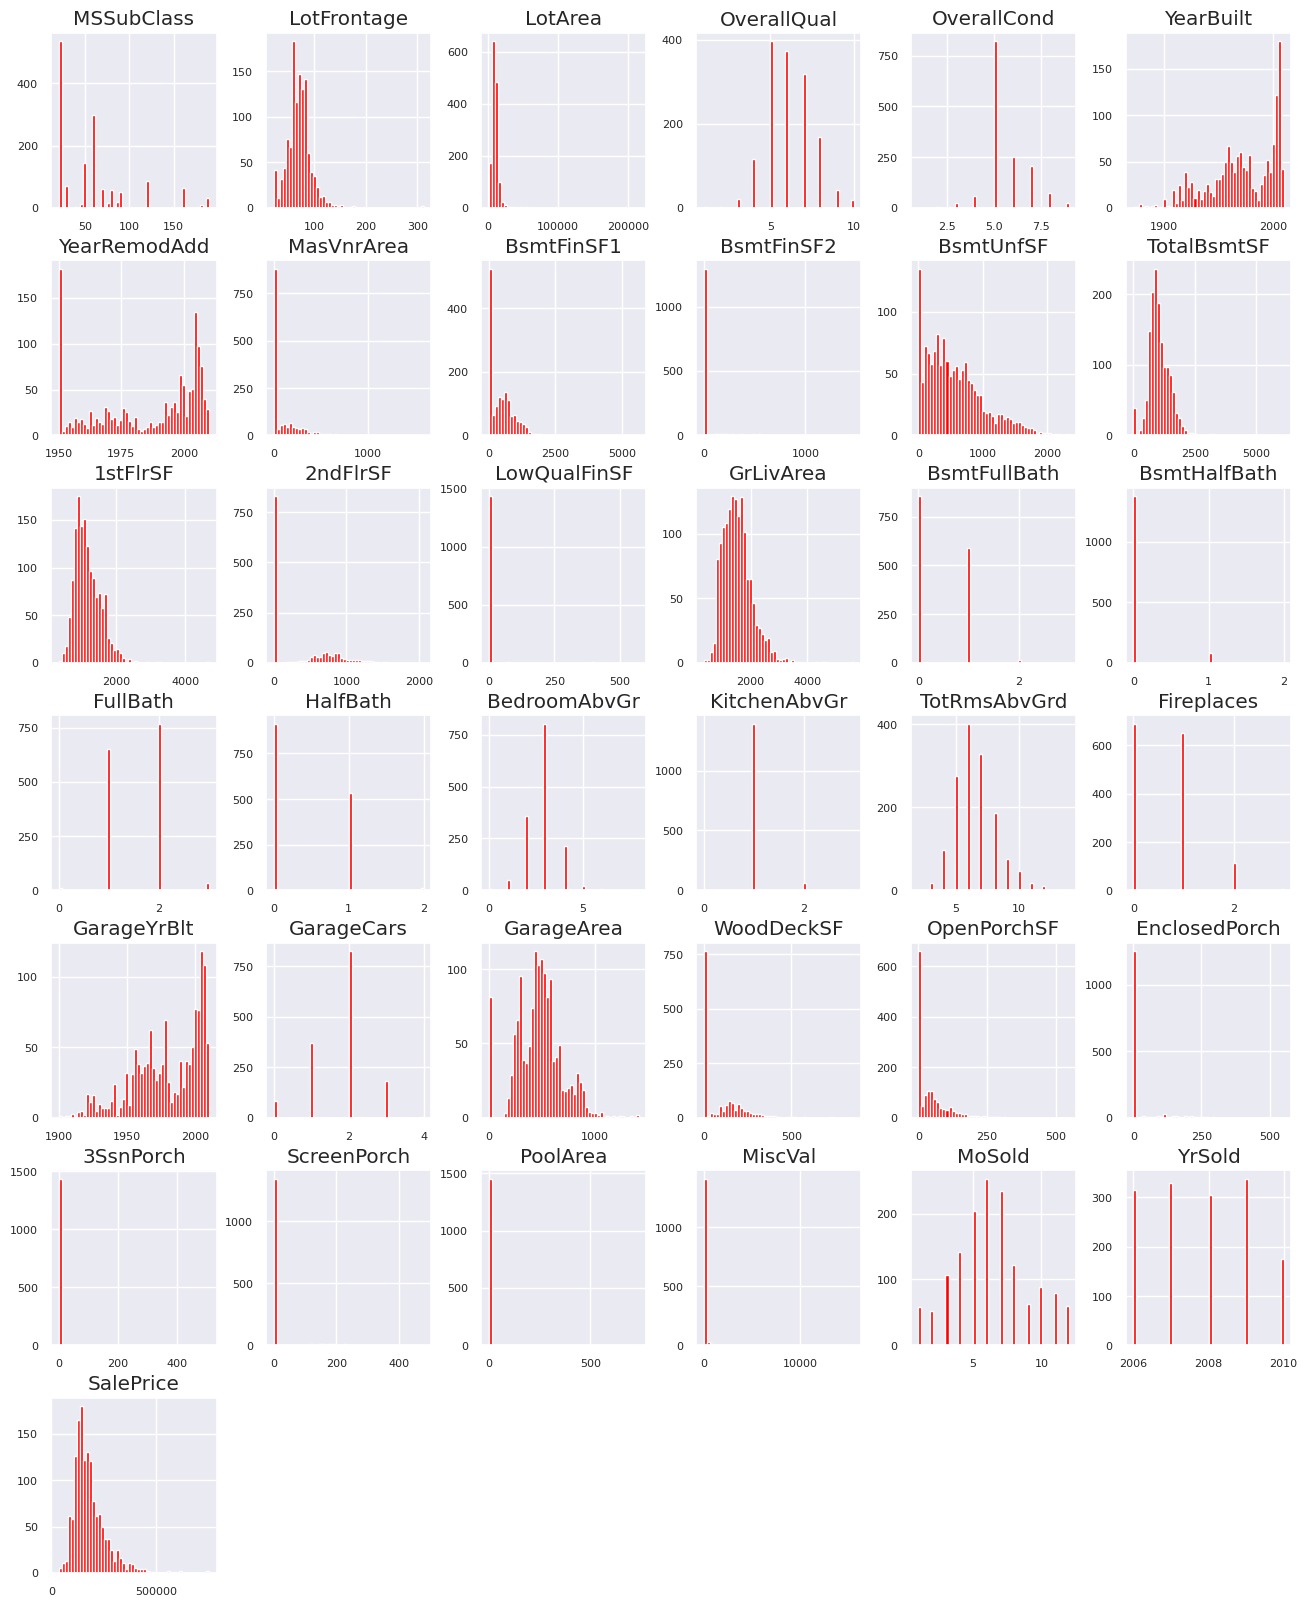

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='Red')
plt.show()

In [ ]:
df_num_corr=df_num.corr()['SalePrice'][:-1]
best_num_features=df_num_corr[abs(df_num_corr)>0.4].sort_values(ascending=False)

In [ ]:
print(f"There Are {len(best_num_features)} Best Features with SalePrice \n\n{best_num_features}")

There Are 13 Best Features with SalePrice 

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64


13. Correlation Heatmap with SalePrice

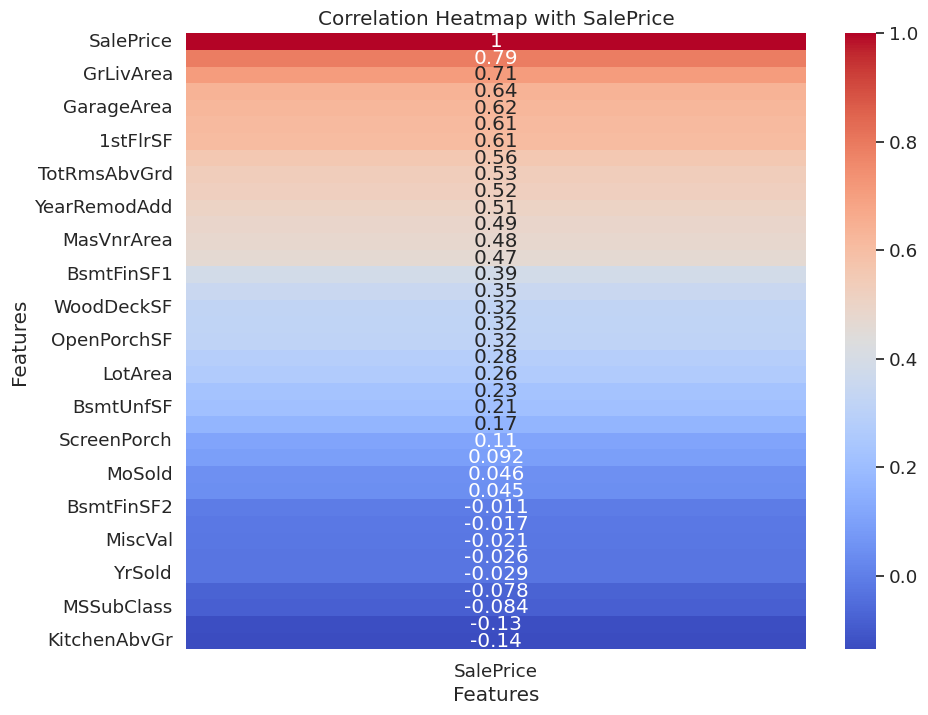

In [ ]:
correlation_matrix=df_num.corr()
salespricecorr=correlation_matrix["SalePrice"].sort_values(ascending=False)
salepricecorr_df=pd.DataFrame(salespricecorr)
plt.figure(figsize=(10, 8))
sns.heatmap(salepricecorr_df, annot=True, cmap="coolwarm", cbar=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap with SalePrice')
plt.show()

14. num_features

In [ ]:
best_num_features.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces'],
      dtype='object')

In [ ]:
best_num_featurelist= ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces','SalePrice']
df_best_num_feature=df.loc[:,best_num_featurelist].copy()

In [ ]:
df_best_num_feature

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1710           2         548          856       856   
1               6       1262           2         460         1262      1262   
2               7       1786           2         608          920       920   
3               7       1717           3         642          756       961   
4               8       2198           3         836         1145      1145   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647           2         460          953       953   
1456            6       2073           2         500         1542      2073   
1457            7       2340           1         252         1152      1188   
1458            5       1078           1         240         1078      1078   
1459            5       1256           1         276         1256      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0            2             8       2003          2003       2003.0   
1            2             6       1976          1976       1976.0   
2            2             6       2001          2002       2001.0   
3            1             7       1915          1970       1998.0   
4            2             9       2000          2000       2000.0   
...        ...           ...        ...           ...          ...   
1455         2             7       1999          2000       1999.0   
1456         2             7       1978          1988       1978.0   
1457         2             9       1941          2006       1941.0   
1458         1             5       1950          1996       1950.0   
1459         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  SalePrice  
0          196.0           0     208500  
1            0.0           1     181500  
2          162.0           1     223500  
3            0.0           1     140000  
4          350.0           1     250000  
...          ...         ...        ...  
1455         0.0           1     175000  
1456       119.0           2     210000  
1457         0.0           2     266500  
1458         0.0           0     142125  
1459         0.0           0     147500  

[1460 rows x 14 columns]

15. feature correlation and Feature Relationship by heatmap

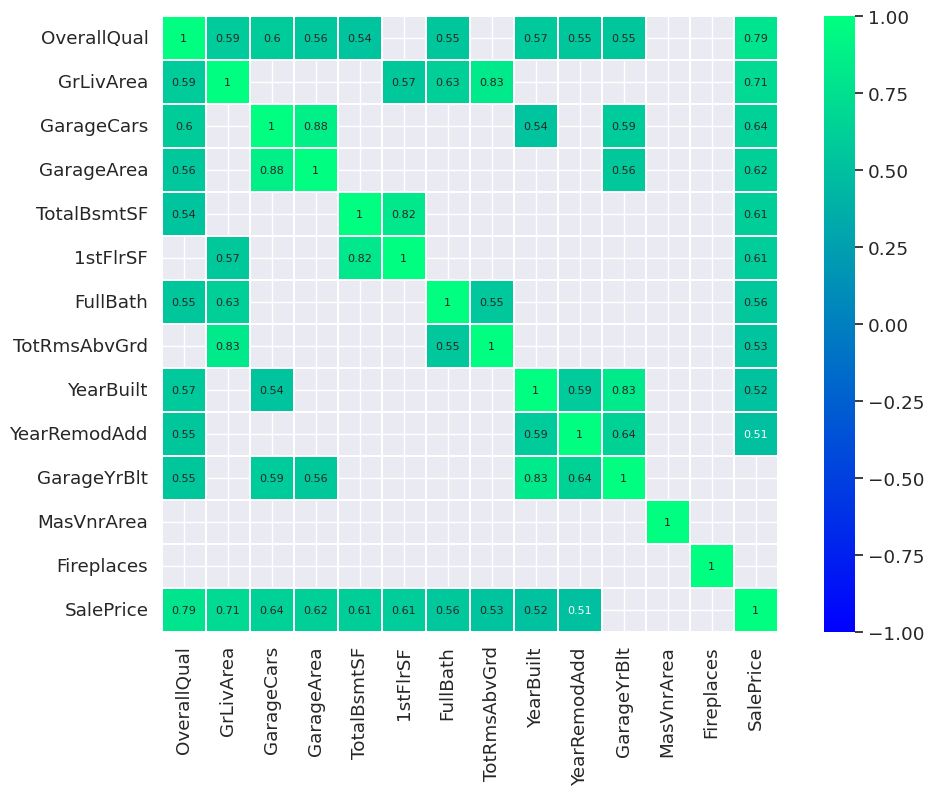

In [ ]:
corr=df_best_num_feature.corr()
paper=plt.figure(figsize=(12,8))
sns.heatmap(corr[(corr>=0.5) |(corr<= -0.4)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.show()

In [ ]:
df_best_num_feature = df_best_num_feature.drop(['GarageYrBlt', 'MasVnrArea', 'Fireplaces'], axis=1)

In [ ]:
df_best_num_feature.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

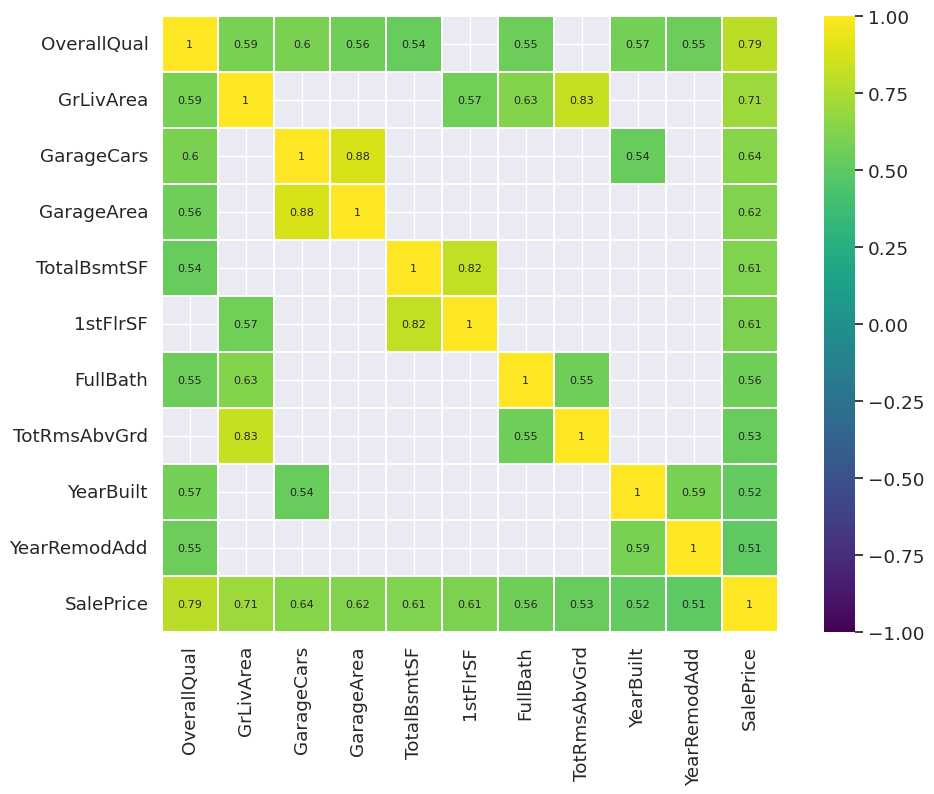

In [ ]:
corr=df_best_num_feature.corr()
paper=plt.figure(figsize=(12,8))
sns.heatmap(corr[(corr>=0.5) |(corr<= -0.4)] ,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

plt.show()

16. pairplot

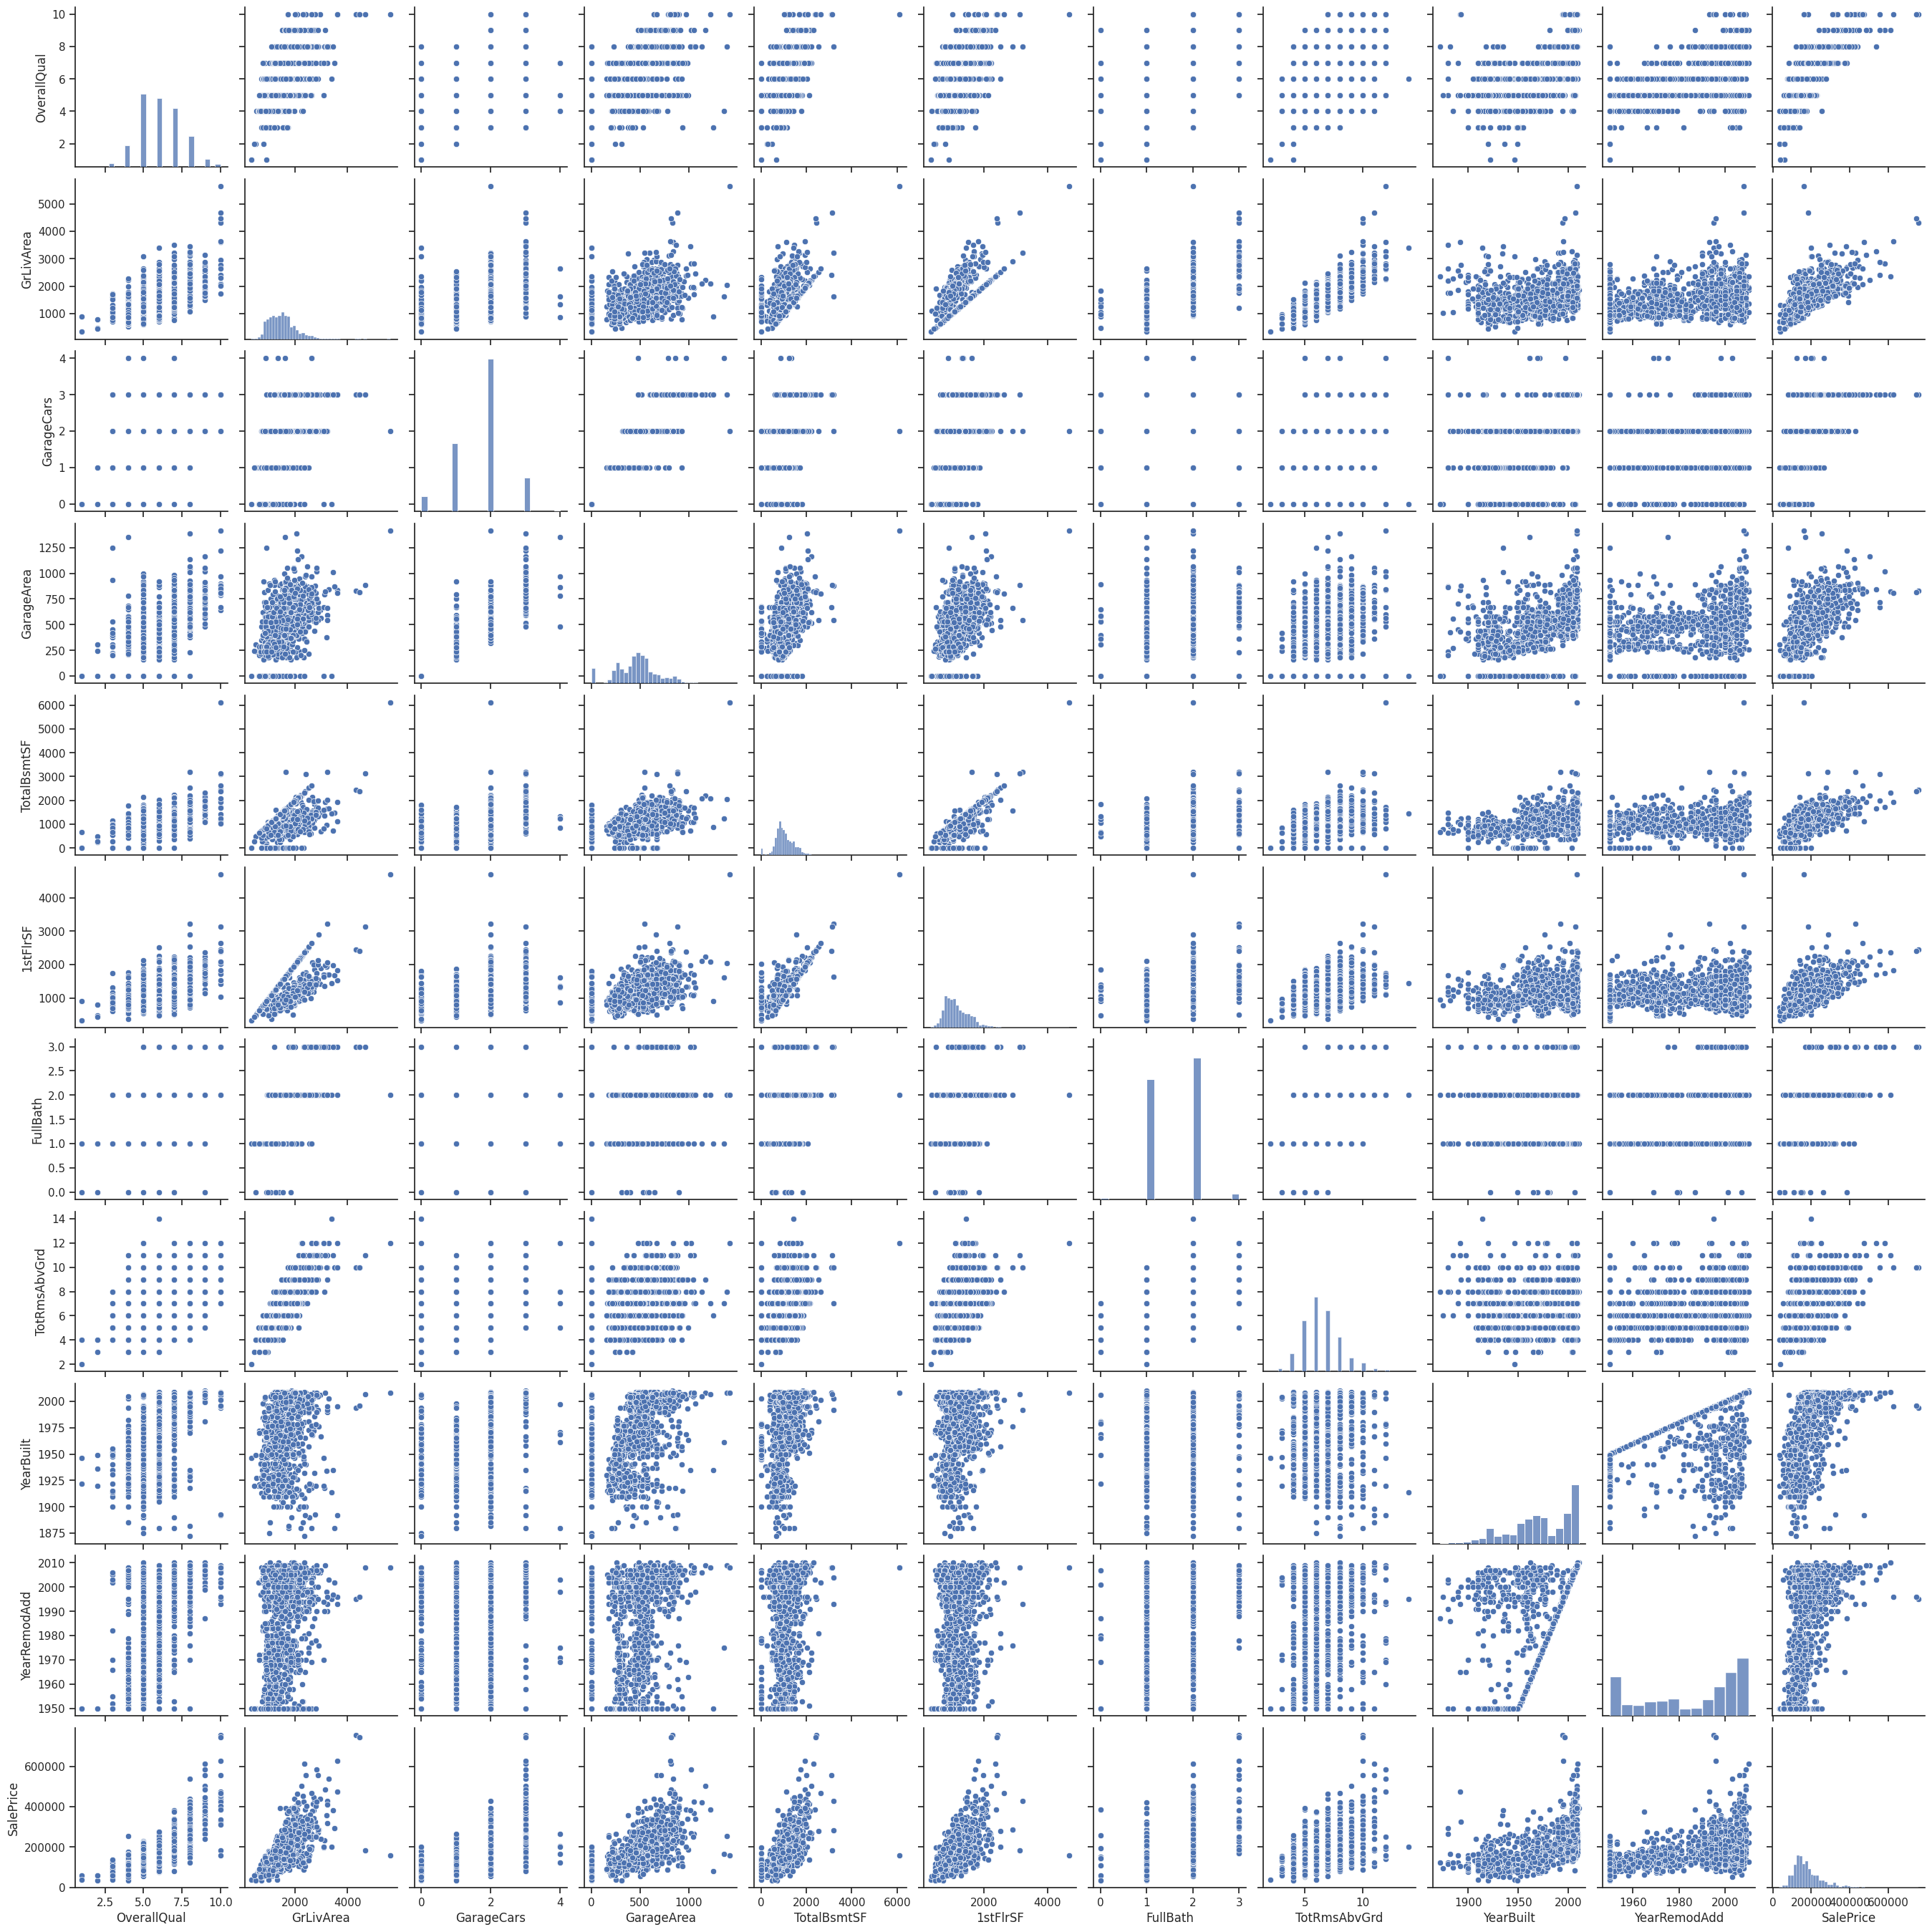

In [ ]:
sns.set(style="ticks")
sns.pairplot(df_best_num_feature)

plt.show()

In [ ]:
df_best_num_feature.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

17. Categorical Data

In [ ]:
df_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

18. unique-Categorical Data

In [ ]:
df_cat.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

19. Neighborhood--Categorical Data

In [ ]:
df_cat['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

20. Sale Price Distribution by Neighborhood by box

In [ ]:
import plotly.express as px
fig = px.box(df, x='Neighborhood', y=df['SalePrice'])

fig.update_layout(
    title='Sale Price Distribution by Neighborhood',
    xaxis=dict(title='Neighborhood'),
    yaxis=dict(title='Sale Price'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)

fig.show()


In [ ]:
df_cat.drop(columns=['Neighborhood'], inplace = True)

In [ ]:
df_cat.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

21. Exterior--Categorical Data

In [ ]:
df_cat['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [ ]:
df_cat['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

22. Sale Price Distribution by Exterior histogram









In [ ]:
fig = px.histogram(df_cat, x='Exterior2nd', y=df['SalePrice'])

fig.update_layout(
    title='Sale Price Distribution by Exterior2nd',
    xaxis=dict(title='Exterior2nd'),
    yaxis=dict(title='Sale Price'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)

fig.show()

In [ ]:
fig = px.histogram(df_cat, x='Exterior1st', y=df['SalePrice'])

fig.update_layout(
    title='Sale Price Distribution by Exterior1st',
    xaxis=dict(title='Exterior1st'),
    yaxis=dict(title='Sale Price'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)

fig.show()

23. Material_Exterior catogorical data

In [ ]:
for material in df_cat['Exterior1st'].unique():
    df_cat[f'Has_{material}_Exterior'] = (df_cat['Exterior1st'] == material) | (df_cat['Exterior2nd'] == material)

df_cat.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)

In [ ]:
for column in df_cat.columns:
    if df_cat[column].nunique() == 2:
        print(df_cat[column].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
False    943
True     517
Name: Has_VinylSd_Exterior, dtype: int64
False    1238
True      222
Name: Has_MetalSd_Exterior, dtype: int64
False    1234
True      226
Name: Has_Wd Sdng_Exterior, dtype: int64
False    1224
True      236
Name: Has_HdBoard_Exterior, dtype: int64
False    1409
True       51
Name: Has_BrkFace_Exterior, dtype: int64
False    1434
True       26
Name: Has_WdShing_Exterior, dtype: int64
False    1399
True       61
Name: Has_CemntBd_Exterior, dtype: int64
False    1306
True      154
Name: Has_Plywood_Exterior, dtype: int64
False    1437
True       23
Name: Has_AsbShng_Exterior, dtype: int64
False    1429
True       31
Name: Has_Stucco_Exterior, dtype: int64
False    1458
True        2
Name: Has_BrkComm_Exterior, dtype: int64
False    1457
True        3
Name: Has_AsphShn_Exterior, dtype: int64
False    14

24. categorical columns

In [ ]:
# Create an empty list to store column names
selected_columns = []

# Loop through the categorical columns
for column in df_cat.columns:
    # Check if the column is binary (unique values equal to 2)
    if df_cat[column].nunique() == 2:
        # Print the value counts for binary columns
        value_counts = df_cat[column].value_counts()
        print(f"Column: {column}")
        print(value_counts)

        # Check if the value count of the most common category is less than 50
        if value_counts.iloc[1] < 50:
            selected_columns.append(column)

# Print the selected columns
print("Selected Columns:", selected_columns)

Column: Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Column: Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Column: CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64
Column: Has_VinylSd_Exterior
False    943
True     517
Name: Has_VinylSd_Exterior, dtype: int64
Column: Has_MetalSd_Exterior
False    1238
True      222
Name: Has_MetalSd_Exterior, dtype: int64
Column: Has_Wd Sdng_Exterior
False    1234
True      226
Name: Has_Wd Sdng_Exterior, dtype: int64
Column: Has_HdBoard_Exterior
False    1224
True      236
Name: Has_HdBoard_Exterior, dtype: int64
Column: Has_BrkFace_Exterior
False    1409
True       51
Name: Has_BrkFace_Exterior, dtype: int64
Column: Has_WdShing_Exterior
False    1434
True       26
Name: Has_WdShing_Exterior, dtype: int64
Column: Has_CemntBd_Exterior
False    1399
True       61
Name: Has_CemntBd_Exterior, dtype: int64
Column: Has_Plywood_Exterior
False    1306
True      154
Name: Has_Plywood_Exterior, dtype: int64
Co

In [ ]:
for i in df_cat[selected_columns]:
    print(df_cat[i].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
False    1434
True       26
Name: Has_WdShing_Exterior, dtype: int64
False    1437
True       23
Name: Has_AsbShng_Exterior, dtype: int64
False    1429
True       31
Name: Has_Stucco_Exterior, dtype: int64
False    1458
True        2
Name: Has_BrkComm_Exterior, dtype: int64
False    1457
True        3
Name: Has_AsphShn_Exterior, dtype: int64
False    1454
True        6
Name: Has_Stone_Exterior, dtype: int64
False    1450
True       10
Name: Has_ImStucc_Exterior, dtype: int64
False    1459
True        1
Name: Has_CBlock_Exterior, dtype: int64


25. drop Selected_columns where most of the values are false

In [ ]:
df_cat.drop(columns=(selected_columns), inplace = True)

In [ ]:
df_cat.shape

(1460, 40)

26. DataFrame with categorical columns
threshold = 0.40

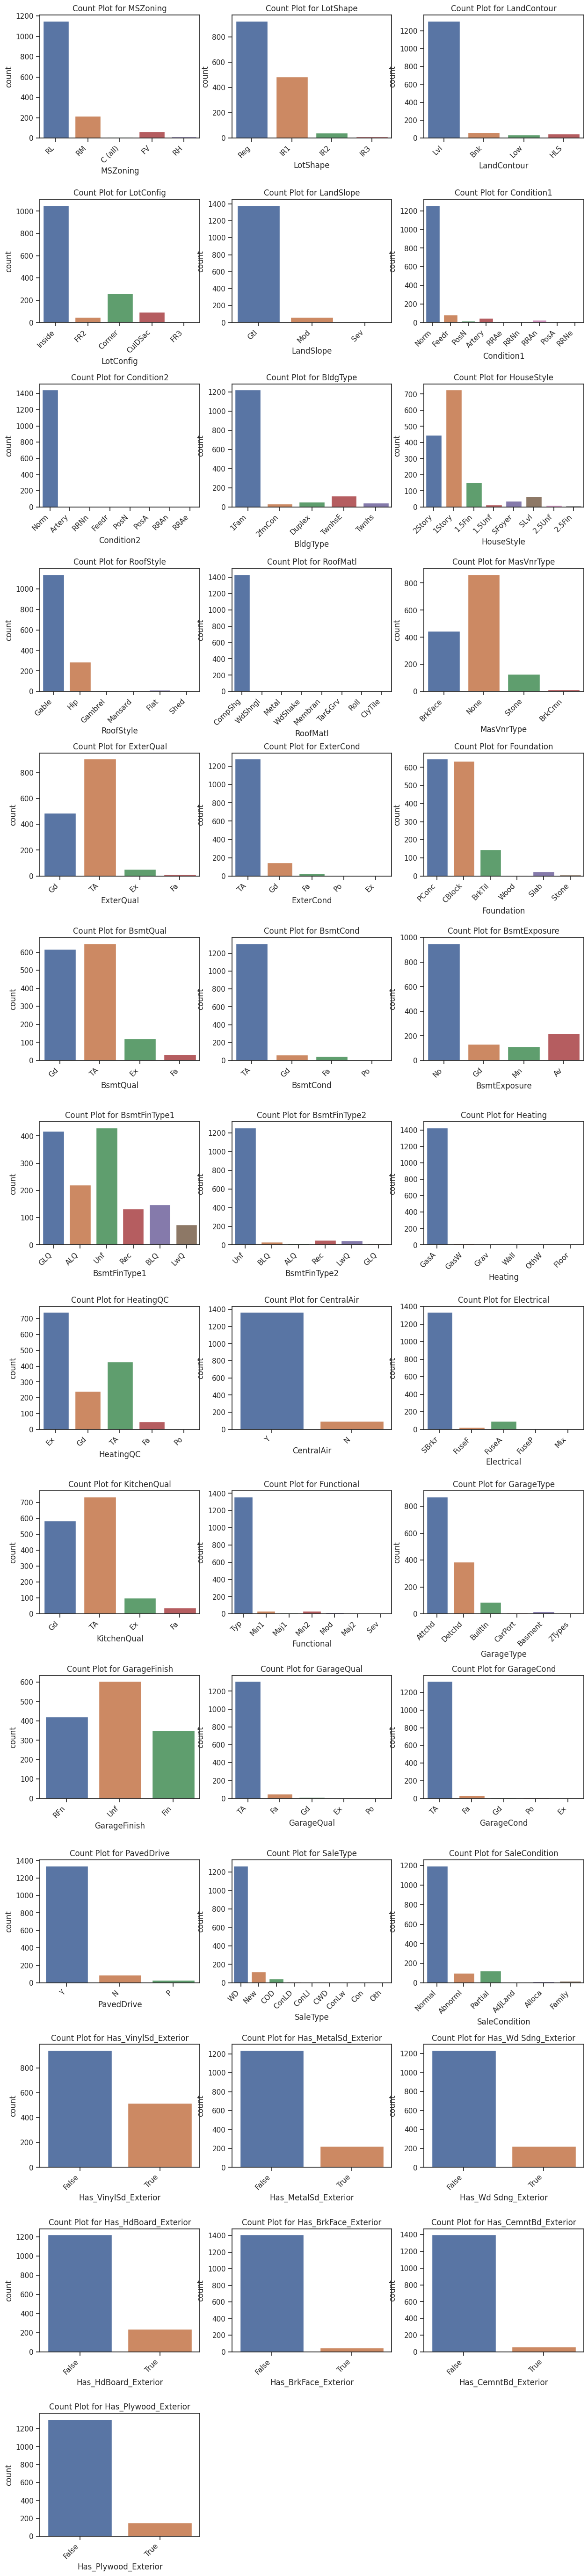

In [ ]:
# Assuming you have a DataFrame df_cat with 40 categorical columns

# Calculate the number of rows needed
num_rows = (len(df_cat.columns) + 2) // 3  # Ceiling division to ensure enough rows

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Loop through categorical columns and create count plots
for i, column in enumerate(df_cat.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    sns.countplot(data=df_cat, x=column, ax=ax)
    ax.set_title(f'Count Plot for {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

     # Remove any empty subplots
for i in range(len(df_cat.columns), num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()



In [ ]:
df_cat.isnull().sum()

MSZoning                 0
LotShape                 0
LandContour              0
LotConfig                0
LandSlope                0
Condition1               0
Condition2               0
BldgType                 0
HouseStyle               0
RoofStyle                0
RoofMatl                 0
MasVnrType               8
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                37
BsmtCond                37
BsmtExposure            38
BsmtFinType1            37
BsmtFinType2            38
Heating                  0
HeatingQC                0
CentralAir               0
Electrical               1
KitchenQual              0
Functional               0
GarageType              81
GarageFinish            81
GarageQual              81
GarageCond              81
PavedDrive               0
SaleType                 0
SaleCondition            0
Has_VinylSd_Exterior     0
Has_MetalSd_Exterior     0
Has_Wd Sdng_Exterior     0
Has_HdBoard_Exterior     0
H

In [ ]:
cat_filled_df = df_cat.fillna(df_cat.mode().iloc[0])

In [ ]:
cat_filled_df.isnull().sum()

MSZoning                0
LotShape                0
LandContour             0
LotConfig               0
LandSlope               0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
RoofStyle               0
RoofMatl                0
MasVnrType              0
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinType2            0
Heating                 0
HeatingQC               0
CentralAir              0
Electrical              0
KitchenQual             0
Functional              0
GarageType              0
GarageFinish            0
GarageQual              0
GarageCond              0
PavedDrive              0
SaleType                0
SaleCondition           0
Has_VinylSd_Exterior    0
Has_MetalSd_Exterior    0
Has_Wd Sdng_Exterior    0
Has_HdBoard_Exterior    0
Has_BrkFace_Exterior    0
Has_CemntBd_

27. DataFrame with categorical columns
threshold = 0.70

In [ ]:
# Assuming df_categorical is your DataFrame with categorical columns
threshold = 0.70  # Define the threshold (70% in this case)

# Calculate the percentage of the most frequent category in each column
category_counts = df_cat.apply(lambda col: col.value_counts().max() / len(col))

# Filter columns where the most frequent category exceeds the threshold
unrelevant_columns = category_counts[category_counts > threshold].index
relevant_columns = category_counts[category_counts < threshold].index

In [ ]:
print(df_cat[unrelevant_columns].shape)
print(df_cat[relevant_columns].shape)
print(f"Numerical {df_best_num_feature.shape}")

(1460, 27)
(1460, 13)
Numerical (1460, 11)


In [ ]:
unrelevant_col= df_cat[unrelevant_columns]

28. unrelevant data processing

In [ ]:
relevant_columns=df_cat[relevant_columns]

In [ ]:
for col in unrelevant_col:
    print(unrelevant_col[col].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran 

In [ ]:
num_plots=len(unrelevant_col.columns)
num_plots_per_row=3
num_row=(num_plots+num_plots_per_row-1)//3
print(num_plots, num_row)

27 9


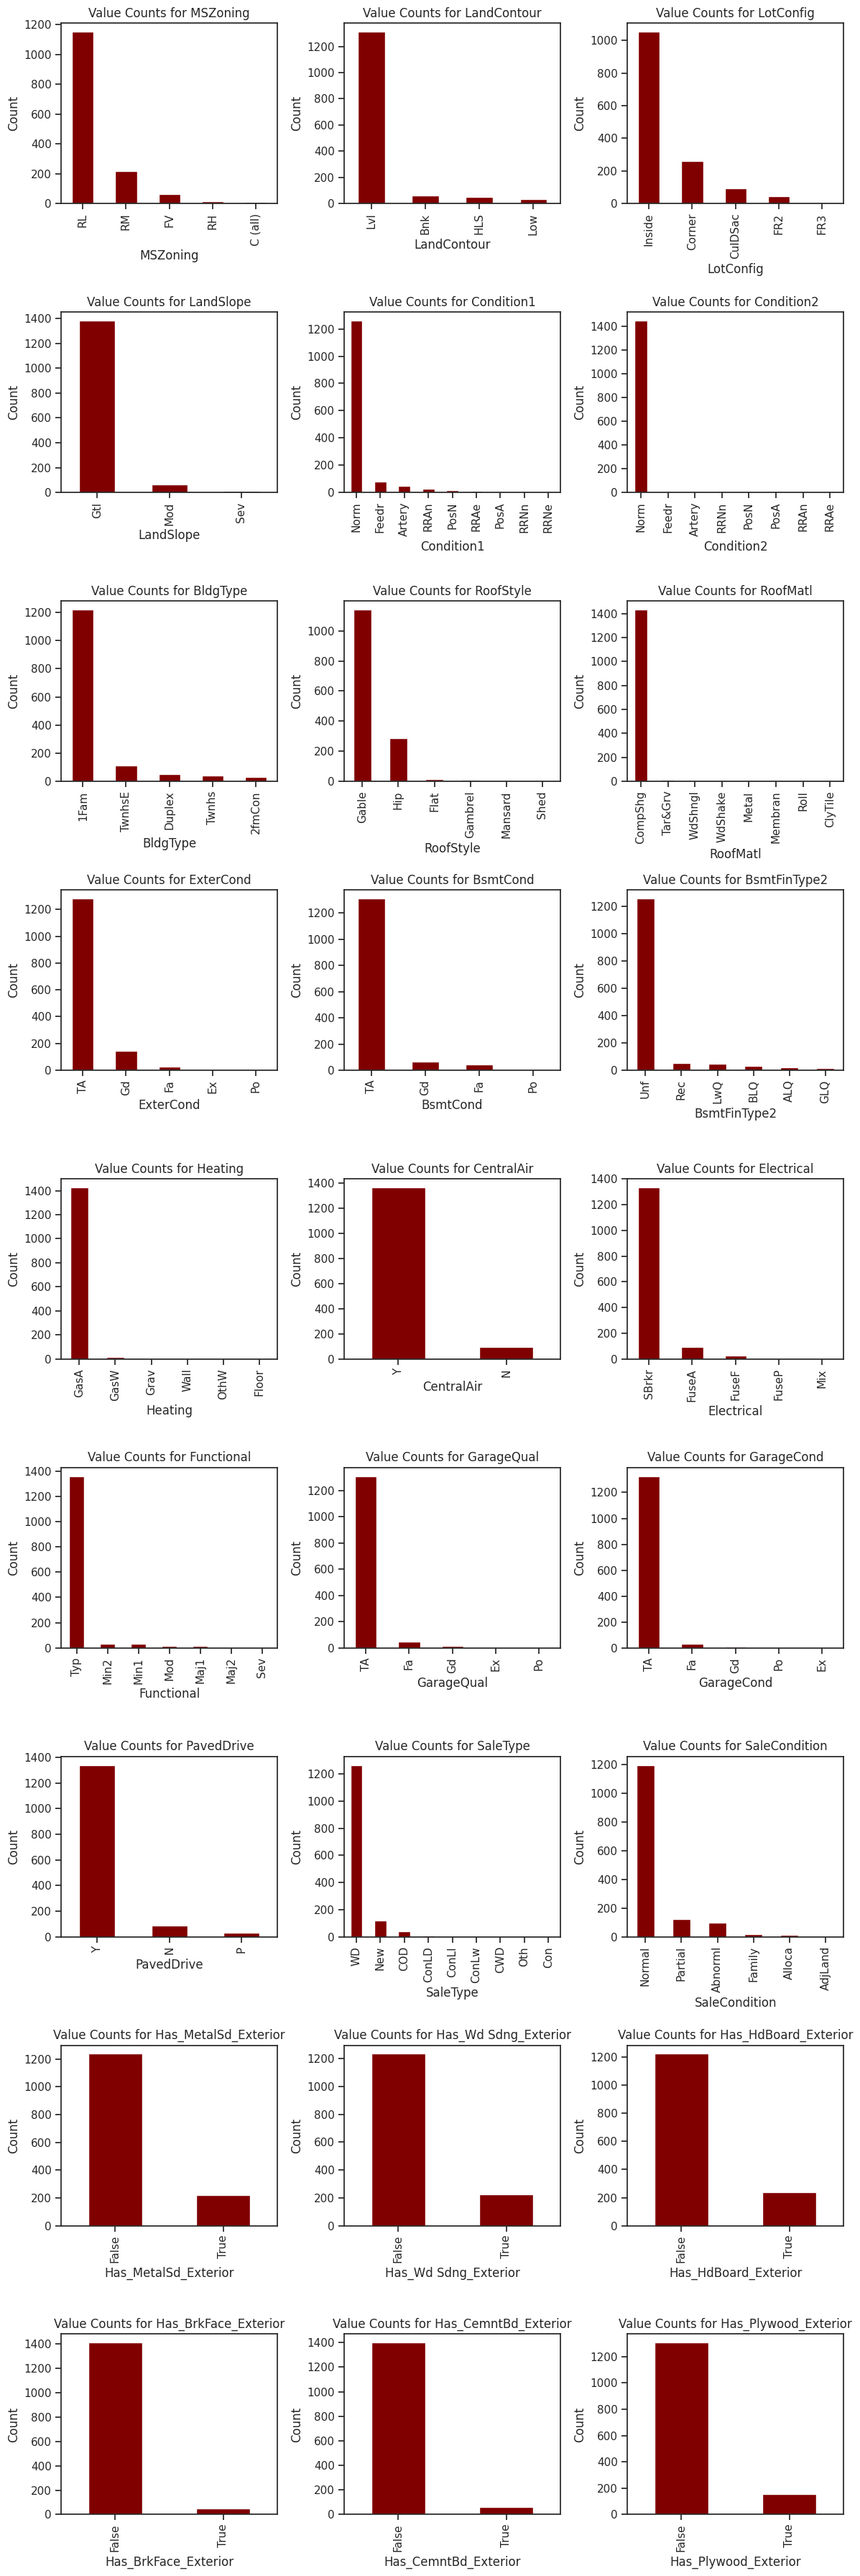

In [ ]:
#create Subplots

fig ,axes = plt.subplots(num_row, num_plots_per_row, figsize=(12,4 * num_row ))
axes = axes.flatten()

for i, column in enumerate(unrelevant_col):
    counts = df_cat[column].value_counts()

    # Create a bar plot on the current subplot
    counts.plot(kind='bar', color='Maroon', ax=axes[i])

    # Set labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Value Counts for {column}')

for i in range(num_plots, num_row * num_plots_per_row):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

In [ ]:
for col in relevant_columns:
    print(relevant_columns[col].value_counts())

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: 

In [ ]:
num_plots=13
num_plots_per_row=3
num_row=(num_plots+num_plots_per_row-1)//3
print(num_plots, num_row)

13 5


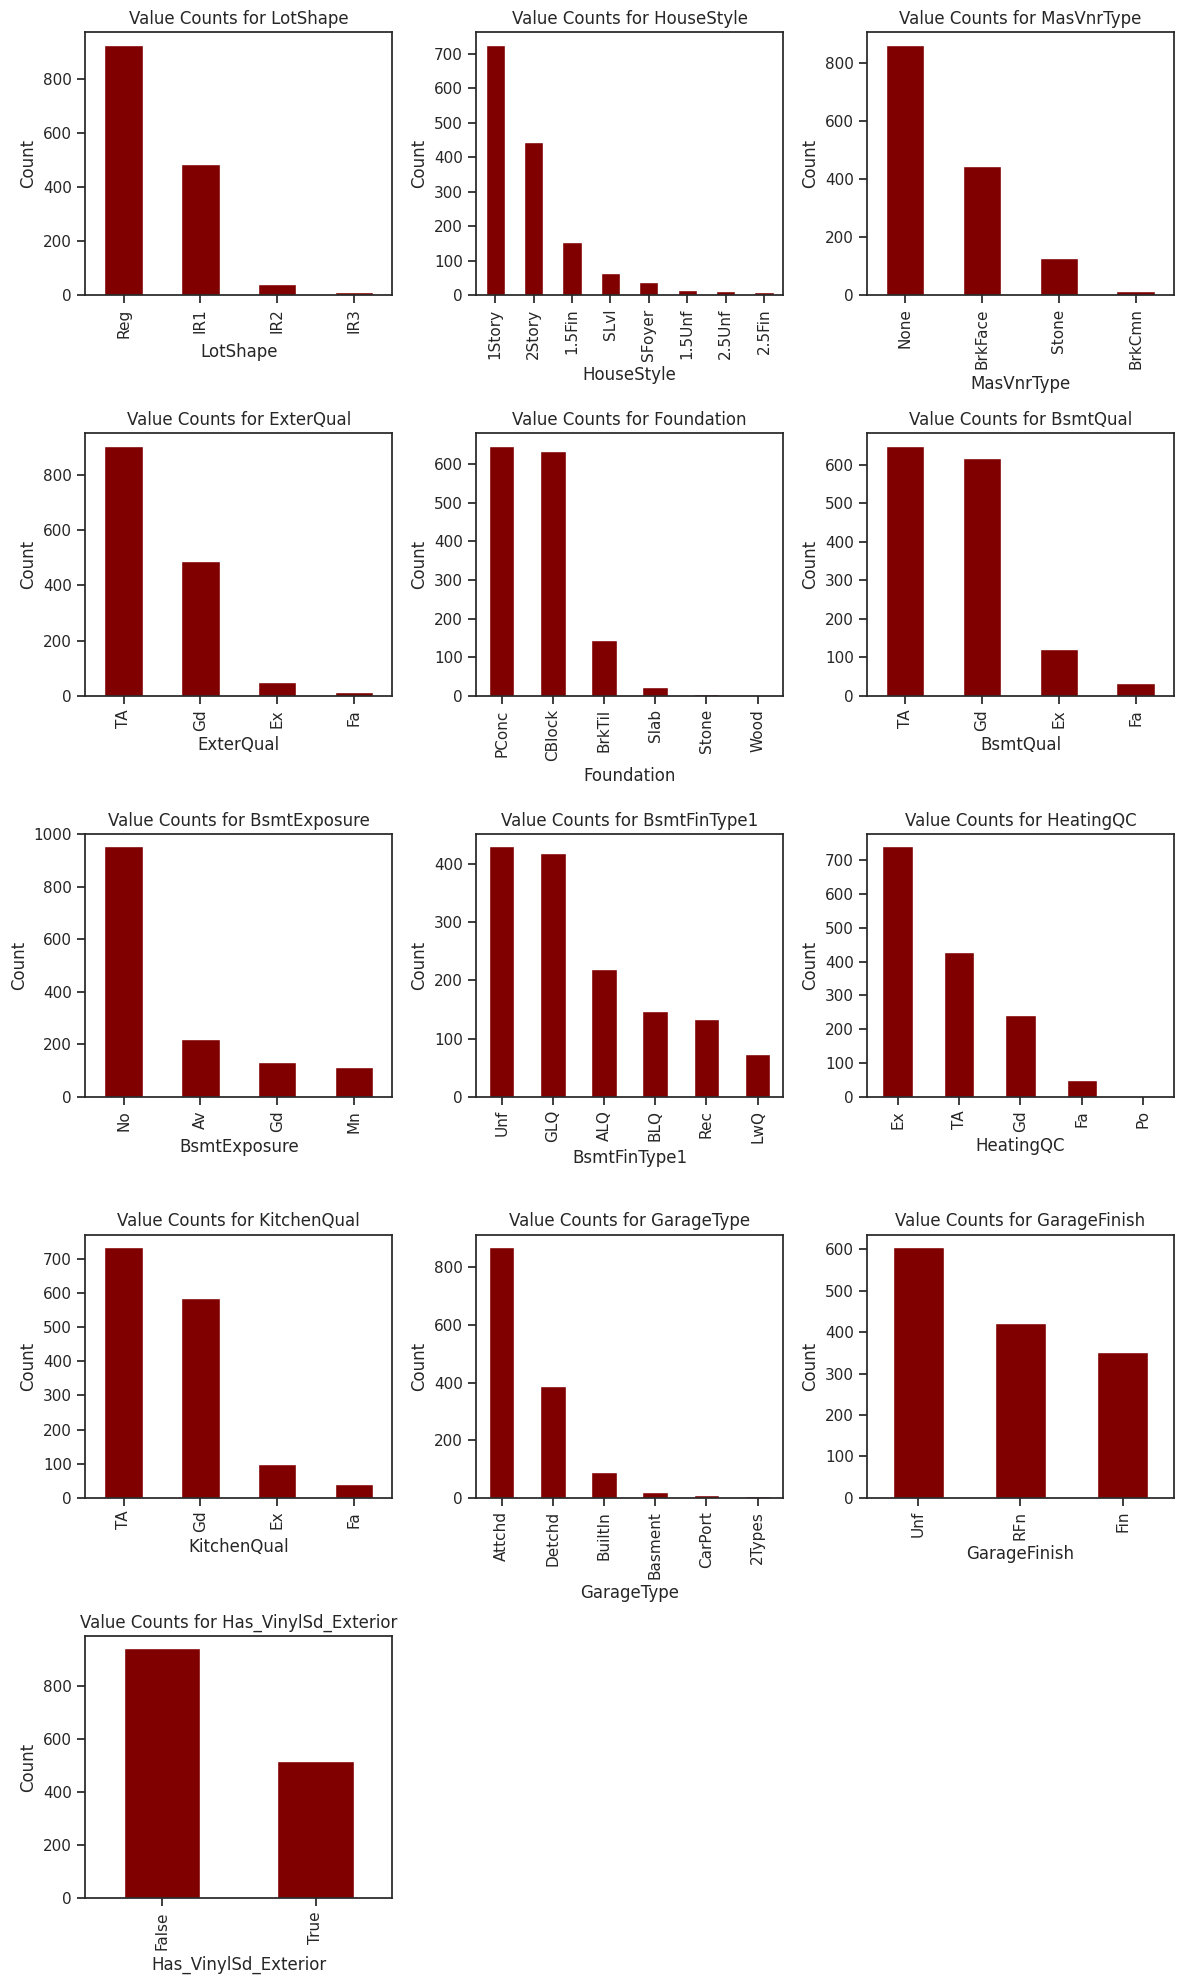

In [ ]:
#create Subplots

fig ,axes = plt.subplots(num_row, num_plots_per_row, figsize=(12,4 * num_row ))
axes = axes.flatten()

for i, column in enumerate(relevant_columns):
    counts = df_cat[column].value_counts()

    # Create a bar plot on the current subplot
    counts.plot(kind='bar', color='Maroon', ax=axes[i])

    # Set labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Value Counts for {column}')

for i in range(num_plots, num_row * num_plots_per_row):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

29 selecting the most relevant features for model training

In [ ]:
df1 = pd.concat([relevant_columns, df_best_num_feature],axis=1)

In [ ]:
df1.head()

LotShape HouseStyle MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0      Reg     2Story    BrkFace        Gd      PConc       Gd           No   
1      Reg     1Story       None        TA     CBlock       Gd           Gd   
2      IR1     2Story    BrkFace        Gd      PConc       Gd           Mn   
3      IR1     2Story       None        TA     BrkTil       TA           No   
4      IR1     2Story    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  \
0          GLQ        Ex          Gd     Attchd          RFn   
1          ALQ        Ex          TA     Attchd          RFn   
2          GLQ        Ex          Gd     Attchd          RFn   
3          ALQ        Gd          Gd     Detchd          Unf   
4          GLQ        Ex          Gd     Attchd          RFn   

   Has_VinylSd_Exterior  OverallQual  GrLivArea  GarageCars  GarageArea  \
0                  True            7       1710           2         548   
1                 False            6       1262           2         460   
2                  True            7       1786           2         608   
3                 False            7       1717           3         642   
4                  True            8       2198           3         836   

   TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  \
0          856       856         2             8       2003          2003   
1         1262      1262         2             6       1976          1976   
2          920       920         2             6       2001          2002   
3          756       961         1             7       1915          1970   
4         1145      1145         2             9       2000          2000   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

30. creating box plot for Sale Price Distribution by LotShape

In [ ]:
fig =px.box(df1, x='LotShape', y='SalePrice')
fig.update_layout(
    title='Sale Price Distribution by LotShape',
    xaxis=dict(title='LotShape'),
    yaxis=dict(title='Sale Price'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)
fig.show()

In [ ]:
for column in df1.columns:
    if column == 'GrLivArea':
        break
    fig = px.box(df1, x=df1[column], y='SalePrice')
    fig.update_layout(
        title=f'Sale Price Distribution by {column}',
        xaxis=dict(title=column),
        yaxis=dict(title='Sale Price'),
        xaxis_tickangle=-45,
        width=800,
        height=400,
    )
    fig.show()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
Num_col = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

for column in df1.columns:
    if column in Num_col:
        fig = px.scatter(df1, x=df1[column], y='SalePrice')
        fig.update_layout(
            title=f'Sale Price Distribution by {column}',
            xaxis=dict(title=column),
            yaxis=dict(title='Sale Price'),
            xaxis_tickangle=-45,
            width=800,
            height=400,
        )
        fig.show()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
for col in df1:
    print(col)
    print(df1[col].value_counts())

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Garage

In [ ]:
check = ['None', 'BrkFace']
df1['MasVnrType'] = df1['MasVnrType'].apply(lambda x: x if x in check else 'others')

In [ ]:
check = ['None', 'BrkFace']
df1['MasVnrType'] = df1['MasVnrType'].apply(lambda x: x if x in check else 'others')

In [ ]:
check = ['Reg', 'IR1']
df1['LotShape'] = df1['LotShape'].apply(lambda x: x if x in check else 'others')

In [ ]:
check = ['1Story', '2Story','1.5Fin']
df1['HouseStyle'] = df1['HouseStyle'].apply(lambda x: x if x in check else 'others')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   LotShape              1460 non-null   object
 1   HouseStyle            1460 non-null   object
 2   MasVnrType            1460 non-null   object
 3   ExterQual             1460 non-null   object
 4   Foundation            1460 non-null   object
 5   BsmtQual              1423 non-null   object
 6   BsmtExposure          1422 non-null   object
 7   BsmtFinType1          1423 non-null   object
 8   HeatingQC             1460 non-null   object
 9   KitchenQual           1460 non-null   object
 10  GarageType            1379 non-null   object
 11  GarageFinish          1379 non-null   object
 12  Has_VinylSd_Exterior  1460 non-null   bool  
 13  OverallQual           1460 non-null   int64 
 14  GrLivArea             1460 non-null   int64 
 15  GarageCars            1460 non-null   

30. Ordinal

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df1 = df1.fillna(df1.mode().iloc[0])

In [ ]:
order_qual = ["Fa", "TA", "Gd", "Ex"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["ExterQual"]])
df1["ExterQual"]=pd.DataFrame(qual_label.transform(df1[["ExterQual"]]))

In [ ]:
order_qual = ["Fa", "TA", "Gd", "Ex"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["BsmtQual"]])
df1["BsmtQual"]=pd.DataFrame(qual_label.transform(df1[["BsmtQual"]]))


In [ ]:
order_qual = ["Reg", "IR1", "others"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["LotShape"]])
df1["LotShape"]=pd.DataFrame(qual_label.transform(df1[["LotShape"]]))


In [ ]:
order_qual = ["1Story", "2Story", "1.5Fin","others"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["HouseStyle"]])

df1["HouseStyle"]=pd.DataFrame(qual_label.transform(df1[["HouseStyle"]]))

In [ ]:
order_qual = ["None", "BrkFace","others"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["MasVnrType"]])

df1["MasVnrType"]=pd.DataFrame(qual_label.transform(df1[["MasVnrType"]]))

In [ ]:
order_qual = ["No", "Av","Gd", "Mn"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["BsmtExposure"]])

df1["BsmtExposure"]=pd.DataFrame(qual_label.transform(df1[["BsmtExposure"]]))

In [ ]:
order_qual = ["PConc", "CBlock","BrkTil", "Slab", "Stone","Wood"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["Foundation"]])

df1["Foundation"]=pd.DataFrame(qual_label.transform(df1[["Foundation"]]))

In [ ]:
order_qual = ["Unf", "GLQ","ALQ", "BLQ","Rec","LwQ"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["BsmtFinType1"]])

df1["BsmtFinType1"]=pd.DataFrame(qual_label.transform(df1[["BsmtFinType1"]]))

In [ ]:
order_qual = ["Fa", "TA", "Gd", "Ex", "Po"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["HeatingQC"]])

OrdinalEncoder(categories=[['Fa', 'TA', 'Gd', 'Ex', 'Po']])

In [ ]:
import pandas as pd


In [ ]:
df1["HeatingQC"]=pd.DataFrame(qual_label.transform(df1[["HeatingQC"]]))
df1["HeatingQC"].value_counts()


3.0    741
1.0    428
2.0    241
0.0     49
4.0      1
Name: HeatingQC, dtype: int64

In [ ]:
order_qual = ["Fa", "TA", "Gd", "Ex"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["KitchenQual"]])

df1["KitchenQual"]=pd.DataFrame(qual_label.transform(df1[["KitchenQual"]]))

In [ ]:
order_qual = ["Attchd", "Detchd","BuiltIn", "Basment","CarPort","2Types"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["GarageType"]])

df1["GarageType"]=pd.DataFrame(qual_label.transform(df1[["GarageType"]]))

In [ ]:
order_qual = ["Unf", "RFn","Fin"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["GarageFinish"]])

df1["GarageFinish"]=pd.DataFrame(qual_label.transform(df1[["GarageFinish"]]))

In [ ]:
df1.head()

LotShape  HouseStyle  MasVnrType  ExterQual  Foundation  BsmtQual  \
0       0.0         1.0         1.0        2.0         0.0       2.0   
1       0.0         0.0         0.0        1.0         1.0       2.0   
2       1.0         1.0         1.0        2.0         0.0       2.0   
3       1.0         1.0         0.0        1.0         2.0       1.0   
4       1.0         1.0         1.0        2.0         0.0       2.0   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0           0.0           1.0        3.0          2.0         0.0   
1           2.0           2.0        3.0          1.0         0.0   
2           3.0           1.0        3.0          2.0         0.0   
3           0.0           2.0        2.0          2.0         1.0   
4           1.0           1.0        3.0          2.0         0.0   

   GarageFinish  Has_VinylSd_Exterior  OverallQual  GrLivArea  GarageCars  \
0           1.0                  True            7       1710           2   
1           1.0                 False            6       1262           2   
2           1.0                  True            7       1786           2   
3           0.0                 False            7       1717           3   
4           1.0                  True            8       2198           3   

   GarageArea  TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  \
0         548          856       856         2             8       2003   
1         460         1262      1262         2             6       1976   
2         608          920       920         2             6       2001   
3         642          756       961         1             7       1915   
4         836         1145      1145         2             9       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000

31. Label Encoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df1['Has_VinylSd_Exterior'] = label_encoder.fit_transform(df1['Has_VinylSd_Exterior'])

In [ ]:
df1.head()

LotShape  HouseStyle  MasVnrType  ExterQual  Foundation  BsmtQual  \
0       0.0         1.0         1.0        2.0         0.0       2.0   
1       0.0         0.0         0.0        1.0         1.0       2.0   
2       1.0         1.0         1.0        2.0         0.0       2.0   
3       1.0         1.0         0.0        1.0         2.0       1.0   
4       1.0         1.0         1.0        2.0         0.0       2.0   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0           0.0           1.0        3.0          2.0         0.0   
1           2.0           2.0        3.0          1.0         0.0   
2           3.0           1.0        3.0          2.0         0.0   
3           0.0           2.0        2.0          2.0         1.0   
4           1.0           1.0        3.0          2.0         0.0   

   GarageFinish  Has_VinylSd_Exterior  OverallQual  GrLivArea  GarageCars  \
0           1.0                     1            7       1710           2   
1           1.0                     0            6       1262           2   
2           1.0                     1            7       1786           2   
3           0.0                     0            7       1717           3   
4           1.0                     1            8       2198           3   

   GarageArea  TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  \
0         548          856       856         2             8       2003   
1         460         1262      1262         2             6       1976   
2         608          920       920         2             6       2001   
3         642          756       961         1             7       1915   
4         836         1145      1145         2             9       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotShape              1460 non-null   float64
 1   HouseStyle            1460 non-null   float64
 2   MasVnrType            1460 non-null   float64
 3   ExterQual             1460 non-null   float64
 4   Foundation            1460 non-null   float64
 5   BsmtQual              1460 non-null   float64
 6   BsmtExposure          1460 non-null   float64
 7   BsmtFinType1          1460 non-null   float64
 8   HeatingQC             1460 non-null   float64
 9   KitchenQual           1460 non-null   float64
 10  GarageType            1460 non-null   float64
 11  GarageFinish          1460 non-null   float64
 12  Has_VinylSd_Exterior  1460 non-null   int64  
 13  OverallQual           1460 non-null   int64  
 14  GrLivArea             1460 non-null   int64  
 15  GarageCars           

# 32. DataNormalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_col=df_best_num_feature.columns[:-1]
numeric_col

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

In [ ]:
df1[numeric_col] = scaler.fit_transform(df1[numeric_col])

In [ ]:
df1.head()

LotShape  HouseStyle  MasVnrType  ExterQual  Foundation  BsmtQual  \
0       0.0         1.0         1.0        2.0         0.0       2.0   
1       0.0         0.0         0.0        1.0         1.0       2.0   
2       1.0         1.0         1.0        2.0         0.0       2.0   
3       1.0         1.0         0.0        1.0         2.0       1.0   
4       1.0         1.0         1.0        2.0         0.0       2.0   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0           0.0           1.0        3.0          2.0         0.0   
1           2.0           2.0        3.0          1.0         0.0   
2           3.0           1.0        3.0          2.0         0.0   
3           0.0           2.0        2.0          2.0         1.0   
4           1.0           1.0        3.0          2.0         0.0   

   GarageFinish  Has_VinylSd_Exterior  OverallQual  GrLivArea  GarageCars  \
0           1.0                     1     0.651479   0.370333    0.311725   
1           1.0                     0    -0.071836  -0.482512    0.311725   
2           1.0                     1     0.651479   0.515013    0.311725   
3           0.0                     0     0.651479   0.383659    1.650307   
4           1.0                     1     1.374795   1.299326    1.650307   

   GarageArea  TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  \
0    0.351000    -0.459303 -0.793434  0.789741      0.912210   1.050994   
1   -0.060731     0.466465  0.257140  0.789741     -0.318683   0.156734   
2    0.631726    -0.313369 -0.627826  0.789741     -0.318683   0.984752   
3    0.790804    -0.687324 -0.521734 -1.026041      0.296763  -1.863632   
4    1.698485     0.199680 -0.045611  0.789741      1.527656   0.951632   

   YearRemodAdd  SalePrice  
0      0.878668     208500  
1     -0.429577     181500  
2      0.830215     223500  
3     -0.720298     140000  
4      0.733308     250000

In [ ]:
df1.drop(columns=['Has_VinylSd_Exterior'], inplace=True)

Model Building to predict house prices accurately by using train,test and split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
y=df1['SalePrice']

In [ ]:
x=df1.drop(columns=['SalePrice'], axis=1)

In [ ]:
print(f"Y shape{y.shape}")
print(f"X shape{x.shape}")

Y shape(1460,)
X shape(1460, 22)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X_train, y_train)
print(f"X_train shape{X_train.shape}")
print(f"y_train shape{y_train.shape}")

X_train shape(1168, 22)
y_train shape(1168,)


32. Linear Model

In [ ]:
y_pred = model.predict(X_test)
print(f"X_test shape{X_test.shape}")

X_test shape(292, 22)


In [ ]:
mse=mean_squared_error(y_test, y_pred)
print(f"Mean Square Error {mse}")

Mean Square Error 2259584718.02292


In [ ]:
r2score=r2_score(y_test, y_pred)
print("R2 Score :\t{:.3F} %".format(r2score*100))

R2 Score :	67.280 %


In [ ]:
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error{mae}")

Mean Absolute Error24664.75520090366


#33.  Test Data

In [ ]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [ ]:
Id=test['Id']

In [ ]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
num_col=df_best_num_feature.columns[:-1]

In [ ]:
num_col

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [ ]:
test_col=test.columns

In [ ]:
test_col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
common_num_col=test_col.intersection(num_col)

In [ ]:
test_num_df=test[common_num_col].copy()

In [ ]:
test_num_df.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
dtype: int64

In [ ]:
test_num_df = test_num_df.fillna(test_num_df.mode().iloc[0])

In [ ]:
test_num_df.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

34. Test Category Columns

In [ ]:
relevant_columns.head()

LotShape HouseStyle MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0      Reg     2Story    BrkFace        Gd      PConc       Gd           No   
1      Reg     1Story       None        TA     CBlock       Gd           Gd   
2      IR1     2Story    BrkFace        Gd      PConc       Gd           Mn   
3      IR1     2Story       None        TA     BrkTil       TA           No   
4      IR1     2Story    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  \
0          GLQ        Ex          Gd     Attchd          RFn   
1          ALQ        Ex          TA     Attchd          RFn   
2          GLQ        Ex          Gd     Attchd          RFn   
3          ALQ        Gd          Gd     Detchd          Unf   
4          GLQ        Ex          Gd     Attchd          RFn   

   Has_VinylSd_Exterior  
0                  True  
1                 False  
2                  True  
3                 False  
4                  True

In [ ]:
cat_col=relevant_columns.columns

36. Intersections of cat columns

In [ ]:
common_cat_col=test_col.intersection(cat_col)
common_cat_col

Index(['LotShape', 'HouseStyle', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish'],
      dtype='object')

In [ ]:
test_cat_df=test[common_cat_col].copy()

In [ ]:
test_cat_df.head()

LotShape HouseStyle MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0      Reg     1Story       None        TA     CBlock       TA           No   
1      IR1     1Story    BrkFace        TA     CBlock       TA           No   
2      IR1     2Story       None        TA      PConc       Gd           No   
3      IR1     2Story    BrkFace        TA      PConc       TA           No   
4      IR1     1Story       None        Gd      PConc       Gd           No   

  BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  
0          Rec        TA          TA     Attchd          Unf  
1          ALQ        TA          Gd     Attchd          Unf  
2          GLQ        Gd          TA     Attchd          Fin  
3          GLQ        Ex          Gd     Attchd          Fin  
4          ALQ        Ex          Gd     Attchd          RFn

In [ ]:
test_cat_df.isnull().sum()

LotShape         0
HouseStyle       0
MasVnrType      16
ExterQual        0
Foundation       0
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
HeatingQC        0
KitchenQual      1
GarageType      76
GarageFinish    78
dtype: int64

In [ ]:
test_cat_df = test_cat_df.fillna(test_cat_df.mode().iloc[0])

In [ ]:
test_cat_df.isnull().sum()

LotShape        0
HouseStyle      0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
KitchenQual     0
GarageType      0
GarageFinish    0
dtype: int64

In [ ]:
df1.head(1)

LotShape  HouseStyle  MasVnrType  ExterQual  Foundation  BsmtQual  \
0       0.0         1.0         1.0        2.0         0.0       2.0   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0           0.0           1.0        3.0          2.0         0.0   

   GarageFinish  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0           1.0     0.651479   0.370333    0.311725       0.351    -0.459303   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  SalePrice  
0 -0.793434  0.789741       0.91221   1.050994      0.878668     208500

In [ ]:
test_cat_df.head(1)

LotShape HouseStyle MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0      Reg     1Story       None        TA     CBlock       TA           No   

  BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  
0          Rec        TA          TA     Attchd          Unf

In [ ]:
test_num_df.head(1)

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            5       1961          1961        882.0       896        896   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0         1             5         1.0       730.0

In [ ]:
# for i in test_cat_df:
#     print(i)
#     print(test_cat_df[i].value_counts())

In [ ]:
# for i in df1:
#     print(i)
#     print(df1[i].value_counts())

37. concat the Numeric and categorical dataset in new dataframe to resolve Feature Missmatch probmlem

In [ ]:
test_df1=pd.concat([test_cat_df, test_num_df],axis=1)

In [ ]:
test_df1.head(1)

LotShape HouseStyle MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0      Reg     1Story       None        TA     CBlock       TA           No   

  BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  OverallQual  \
0          Rec        TA          TA     Attchd          Unf            5   

   YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
0       1961          1961        882.0       896        896         1   

   TotRmsAbvGrd  GarageCars  GarageArea  
0             5         1.0       730.0

In [ ]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1459 non-null   object 
 1   HouseStyle    1459 non-null   object 
 2   MasVnrType    1459 non-null   object 
 3   ExterQual     1459 non-null   object 
 4   Foundation    1459 non-null   float64
 5   BsmtQual      1459 non-null   object 
 6   BsmtExposure  1459 non-null   float64
 7   BsmtFinType1  1459 non-null   float64
 8   HeatingQC     1459 non-null   float64
 9   KitchenQual   1459 non-null   float64
 10  GarageType    1459 non-null   float64
 11  GarageFinish  1459 non-null   float64
 12  OverallQual   1459 non-null   int64  
 13  YearBuilt     1459 non-null   int64  
 14  YearRemodAdd  1459 non-null   int64  
 15  TotalBsmtSF   1459 non-null   float64
 16  1stFlrSF      1459 non-null   int64  
 17  GrLivArea     1459 non-null   int64  
 18  FullBath      1459 non-null 

38. transform_dataframe for data mismatch

In [ ]:
def transform_dataframe(df):
    check = ['None', 'BrkFace']
    df['MasVnrType'] = df['MasVnrType'].apply(lambda x: x if x in check else 'others')

    check = ['Reg', 'IR1']
    df['LotShape'] = df['LotShape'].apply(lambda x: x if x in check else 'others')

    check = ['1Story', '2Story', '1.5Fin']
    df['HouseStyle'] = df['HouseStyle'].apply(lambda x: x if x in check else 'others')
    order_qual = ["PConc", "CBlock","BrkTil", "Slab", "Stone","Wood"]
    qual_label=OrdinalEncoder(categories=[order_qual])
    qual_label.fit(df[["Foundation"]])

    df["Foundation"]=pd.DataFrame(qual_label.transform(df[["Foundation"]]))

    order_qual = ["No", "Av","Gd", "Mn"]
    qual_label=OrdinalEncoder(categories=[order_qual])
    qual_label.fit(df[["BsmtExposure"]])

    df["BsmtExposure"]=pd.DataFrame(qual_label.transform(df[["BsmtExposure"]]))

    order_qual = ["Unf", "GLQ","ALQ", "BLQ","Rec","LwQ"]
    qual_label=OrdinalEncoder(categories=[order_qual])
    qual_label.fit(df[["BsmtFinType1"]])

    df["BsmtFinType1"]=pd.DataFrame(qual_label.transform(df[["BsmtFinType1"]]))


    order_qual = ["Fa", "TA", "Gd", "Ex", "Po"]
    qual_label=OrdinalEncoder(categories=[order_qual])
    qual_label.fit(df[["HeatingQC"]])

    df["HeatingQC"]=pd.DataFrame(qual_label.transform(df[["HeatingQC"]]))


    order_qual = ["Fa", "TA", "Gd", "Ex"]
    qual_label=OrdinalEncoder(categories=[order_qual])
    qual_label.fit(df[["KitchenQual"]])

    df["KitchenQual"]=pd.DataFrame(qual_label.transform(df[["KitchenQual"]]))

    order_qual = ["Attchd", "Detchd","BuiltIn", "Basment","CarPort","2Types"]
    qual_label=OrdinalEncoder(categories=[order_qual])
    qual_label.fit(df[["GarageType"]])

    df["GarageType"]=pd.DataFrame(qual_label.transform(df[["GarageType"]]))

    order_qual = ["Unf", "RFn","Fin"]
    qual_label=OrdinalEncoder(categories=[order_qual])
    qual_label.fit(df[["GarageFinish"]])

    df["GarageFinish"]=pd.DataFrame(qual_label.transform(df[["GarageFinish"]]))



    return df
    test_df1 = transform_dataframe(test_df1)

In [ ]:
test_df1.head()

LotShape HouseStyle MasVnrType ExterQual  Foundation BsmtQual  BsmtExposure  \
0   others     others     others        TA         1.0       TA           0.0   
1   others     others     others        TA         1.0       TA           0.0   
2   others     others     others        TA         0.0       Gd           0.0   
3   others     others     others        TA         0.0       TA           0.0   
4   others     others     others        Gd         0.0       Gd           0.0   

   BsmtFinType1  HeatingQC  KitchenQual  GarageType  GarageFinish  \
0           4.0        1.0          1.0         0.0           0.0   
1           2.0        1.0          2.0         0.0           0.0   
2           1.0        2.0          1.0         0.0           2.0   
3           1.0        3.0          2.0         0.0           2.0   
4           2.0        3.0          2.0         0.0           1.0   

   OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            5       1961          1961        882.0       896        896   
1            6       1958          1958       1329.0      1329       1329   
2            5       1997          1998        928.0       928       1629   
3            6       1998          1998        926.0       926       1604   
4            8       1992          1992       1280.0      1280       1280   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0         1             5         1.0       730.0  
1         1             6         1.0       312.0  
2         2             6         2.0       482.0  
3         2             7         2.0       470.0  
4         2             5         2.0       506.0

In [ ]:
order_qual = ["Reg", "IR1", "others"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(test_df1[["LotShape"]])

test_df1["LotShape"]=pd.DataFrame(qual_label.transform(test_df1[["LotShape"]]))

order_qual = ["1Story", "2Story", "1.5Fin","others"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(test_df1[["HouseStyle"]])

test_df1["HouseStyle"]=pd.DataFrame(qual_label.transform(test_df1[["HouseStyle"]]))

order_qual = ["None", "BrkFace","others"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(test_df1[["MasVnrType"]])

test_df1["MasVnrType"]=pd.DataFrame(qual_label.transform(test_df1[["MasVnrType"]]))

In [ ]:
test_df1.head()

LotShape  HouseStyle  MasVnrType ExterQual  Foundation BsmtQual  \
0       2.0         3.0         2.0        TA         1.0       TA   
1       2.0         3.0         2.0        TA         1.0       TA   
2       2.0         3.0         2.0        TA         0.0       Gd   
3       2.0         3.0         2.0        TA         0.0       TA   
4       2.0         3.0         2.0        Gd         0.0       Gd   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0           0.0           4.0        1.0          1.0         0.0   
1           0.0           2.0        1.0          2.0         0.0   
2           0.0           1.0        2.0          1.0         0.0   
3           0.0           1.0        3.0          2.0         0.0   
4           0.0           2.0        3.0          2.0         0.0   

   GarageFinish  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0           0.0            5       1961          1961        882.0       896   
1           0.0            6       1958          1958       1329.0      1329   
2           2.0            5       1997          1998        928.0       928   
3           2.0            6       1998          1998        926.0       926   
4           1.0            8       1992          1992       1280.0      1280   

   GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0        896         1             5         1.0       730.0  
1       1329         1             6         1.0       312.0  
2       1629         2             6         2.0       482.0  
3       1604         2             7         2.0       470.0  
4       1280         2             5         2.0       506.0

In [ ]:
df_best_num_feature.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  SalePrice  
0         2             8       2003          2003     208500  
1         2             6       1976          1976     181500  
2         2             6       2001          2002     223500  
3         1             7       1915          1970     140000  
4         2             9       2000          2000     250000

In [ ]:
backup=test_df1.copy()

In [ ]:
def standard_scalar_fun(df):
    # Assuming df contains the numeric columns you want to standardize
    numeric_col = df.columns[:-1]  # Use df.columns[:-1] to exclude the last column if needed

    scaler = StandardScaler()
    df[numeric_col] = scaler.fit_transform(df[numeric_col])
    return df

In [ ]:
test_num_df = standard_scalar_fun(test_num_df)

In [ ]:
test_num_df

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0       -0.751101  -0.340945     -1.072885    -0.368484 -0.654561  -1.215588   
1       -0.054877  -0.439695     -1.214908     0.639542  0.433298  -0.323539   
2       -0.751101   0.844059      0.678742    -0.264750 -0.574165   0.294508   
3       -0.054877   0.876976      0.678742    -0.269260 -0.579190   0.243004   
4        1.337571   0.679475      0.394694     0.529042  0.310192  -0.424487   
...           ...        ...           ...          ...       ...        ...   
1454    -1.447325  -0.044694     -0.646813    -1.126195 -1.533893  -0.811797   
1455    -1.447325  -0.044694     -0.646813    -1.126195 -1.533893  -0.811797   
1456    -0.751101  -0.373861      0.584059     0.402757  0.169499  -0.539856   
1457    -0.751101   0.679475      0.394694    -0.300831 -0.468645  -1.063136   
1458     0.641347   0.712392      0.489377    -0.111404 -0.403324   1.058827   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0    -1.028720     -0.918335   -0.988189       730.0  
1    -1.028720     -0.255371   -0.988189       312.0  
2     0.773083     -0.255371    0.301406       482.0  
3     0.773083      0.407593    0.301406       470.0  
4     0.773083     -0.918335    0.301406       506.0  
...        ...           ...         ...         ...  
1454 -1.028720     -0.918335   -2.277784         0.0  
1455 -1.028720     -0.255371   -0.988189       286.0  
1456 -1.028720      0.407593    0.301406       576.0  
1457 -1.028720     -0.255371   -2.277784         0.0  
1458  0.773083      1.733522    1.591001       650.0  

[1459 rows x 10 columns]

In [ ]:
test_df2 =pd.concat([test_df1.iloc[:, :12],test_num_df],axis=1 )

In [ ]:
test_df2.head(2)

LotShape  HouseStyle  MasVnrType ExterQual  Foundation BsmtQual  \
0       2.0         3.0         2.0        TA         1.0       TA   
1       2.0         3.0         2.0        TA         1.0       TA   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0           0.0           4.0        1.0          1.0         0.0   
1           0.0           2.0        1.0          2.0         0.0   

   GarageFinish  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0           0.0    -0.751101  -0.340945     -1.072885    -0.368484 -0.654561   
1           0.0    -0.054877  -0.439695     -1.214908     0.639542  0.433298   

   GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0  -1.215588  -1.02872     -0.918335   -0.988189       730.0  
1  -0.323539  -1.02872     -0.255371   -0.988189       312.0

In [ ]:
test_df1.iloc[:, :12]

LotShape  HouseStyle  MasVnrType ExterQual  Foundation BsmtQual  \
0          2.0         3.0         2.0        TA         1.0       TA   
1          2.0         3.0         2.0        TA         1.0       TA   
2          2.0         3.0         2.0        TA         0.0       Gd   
3          2.0         3.0         2.0        TA         0.0       TA   
4          2.0         3.0         2.0        Gd         0.0       Gd   
...        ...         ...         ...       ...         ...      ...   
1454       2.0         3.0         2.0        TA         1.0       TA   
1455       2.0         3.0         2.0        TA         1.0       TA   
1456       2.0         3.0         2.0        TA         1.0       TA   
1457       2.0         3.0         2.0        TA         0.0       Gd   
1458       2.0         3.0         2.0        TA         0.0       Gd   

      BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0              0.0           4.0        1.0          1.0         0.0   
1              0.0           2.0        1.0          2.0         0.0   
2              0.0           1.0        2.0          1.0         0.0   
3              0.0           1.0        3.0          2.0         0.0   
4              0.0           2.0        3.0          2.0         0.0   
...            ...           ...        ...          ...         ...   
1454           0.0           0.0        2.0          1.0         0.0   
1455           0.0           4.0        1.0          1.0         4.0   
1456           0.0           2.0        3.0          1.0         1.0   
1457           1.0           1.0        1.0          1.0         0.0   
1458           1.0           5.0        3.0          1.0         0.0   

      GarageFinish  
0              0.0  
1              0.0  
2              2.0  
3              2.0  
4              1.0  
...            ...  
1454           0.0  
1455           0.0  
1456           0.0  
1457           0.0  
1458           2.0  

[1459 rows x 12 columns]

In [ ]:
train_col=df1.columns[:-1]

In [ ]:
train_col

Index(['LotShape', 'HouseStyle', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [ ]:
test_df3=test_df2[train_col]

In [ ]:
test_df3.columns

Index(['LotShape', 'HouseStyle', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [ ]:
common_columns = set(df1.columns.tolist()).intersection(test_df2.columns.tolist())
print(len(common_columns))
print(len(df1.columns.tolist()))

22
23


In [ ]:
test_df3=test_df2[train_col]

In [ ]:
test_df3['BsmtQual'].value_counts()

TA    678
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [ ]:
test_df3.head(2)

LotShape  HouseStyle  MasVnrType ExterQual  Foundation BsmtQual  \
0       2.0         3.0         2.0        TA         1.0       TA   
1       2.0         3.0         2.0        TA         1.0       TA   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  GarageType  \
0           0.0           4.0        1.0          1.0         0.0   
1           0.0           2.0        1.0          2.0         0.0   

   GarageFinish  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0           0.0    -0.751101  -1.215588   -0.988189       730.0    -0.368484   
1           0.0    -0.054877  -0.323539   -0.988189       312.0     0.639542   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0 -0.654561  -1.02872     -0.918335  -0.340945     -1.072885  
1  0.433298  -1.02872     -0.255371  -0.439695     -1.214908

In [ ]:
order_qual = ["TA", "Gd","Ex","Fa"]
qual_label=OrdinalEncoder(categories=[order_qual])
qual_label.fit(test_df3[["BsmtQual"]])

test_df3["BsmtQual"]=pd.DataFrame(qual_label.transform(test_df3[["BsmtQual"]]))

In [ ]:
# order_qual = ["TA", "Gd","Ex","Fa"]
# qual_label=OrdinalEncoder(categories=[order_qual])

# qual_label.fit(test_df3[["ExterQual"]])

# test_df3["ExterQual"]=pd.DataFrame(qual_label.transform(test_df3[["ExterQual"]]))


39.Test Model fit in to algorithm

In [ ]:
qual_label.fit(test_df3[["ExterQual"]])

OrdinalEncoder(categories=[['TA', 'Gd', 'Ex', 'Fa']])

In [ ]:
test_df3["ExterQual"]=pd.DataFrame(qual_label.transform(test_df3[["ExterQual"]]))

In [ ]:
x_test=test_df3.copy()

In [ ]:
x_test=test_df3.copy()
test_data_predict=model.predict(x_test)
# results_df = pd.DataFrame({'Id': id, 'SalePrice': test_data_predict})
# results_df.to_csv('house_prices_LinearRegression.csv', index=False)

In [ ]:
results_df = pd.DataFrame({'Id': id, 'SalePrice': test_data_predict})

In [ ]:
results_df.to_csv('house_prices_Advanced_linear_regression.csv', index=False)

In [ ]:
results_df

Id     SalePrice
0     <built-in function id>  6.778414e+06
1     <built-in function id>  3.013970e+06
2     <built-in function id>  4.563539e+06
3     <built-in function id>  4.464248e+06
4     <built-in function id>  4.830167e+06
...                      ...           ...
1454  <built-in function id>  8.482558e+04
1455  <built-in function id>  2.699614e+06
1456  <built-in function id>  5.399117e+06
1457  <built-in function id>  1.210168e+05
1458  <built-in function id>  6.160100e+06

[1459 rows x 2 columns]

40. Conclusion:

Our Linear Regression model, with an R2 score of 67.280%, demonstrates promise in explaining housing price variations.

However, improvements are needed to reduce the Mean Square Error (MSE) of approximately 2,259,584,718.02 and the

Mean Absolute Error (MAE) of $24,664.76